In [72]:
import numpy as np
import pandas as pd
import os
import spacy
import en_core_web_sm
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
import string
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
!pip install vaderSentiment
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
# preprocessing the data file
#  read the data
df1 = pd.read_csv("/content/drugsComTrain_raw.csv",encoding_errors='ignore')
df2 = pd.read_csv("/content/drugsComTest_raw.csv",encoding_errors='ignore')
# combine two file
df = pd.concat([df1, df2])
df
# rename the cols
# df.columns = ['ID','DRUG NAME','CONDITION','REVIEW','RATING','DATE','USEFUL COUNT']

,ID,DRUG NAME,CONDITION,REVIEW,RATING,DATE,USEFUL COUNT,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,May-20,27,NaN,NaN,NaN
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,Apr-27,192,NaN,NaN,NaN
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,Dec-14,17,NaN,NaN,NaN
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,Nov-03,10,NaN,NaN,NaN
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,Nov-27,37,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
14004,96754,Crisaborole,Atopic Dermatitis,"""This is the greatest solution to a problem th...",10,Sep-20,7,NaN,NaN,NaN
14005,194059,Stribild,HIV Infection,"""I was newly diagnosed December 2014. My CD4 c...",10,Mar-18,20,NaN,NaN,NaN
14006,51718,Aczone,Acne,"""After my teen years I thought I had finally g...",10,Jan-23,42,NaN,NaN,NaN
14007,155666,Metronidazole,Bacterial Vaginitis,"""Well, I&#039;ve been taking it for a few days...",6,Jun-11,14,NaN,NaN,NaN


In [74]:
df.columns

Index(['ID', 'DRUG NAME', 'CONDITION', 'REVIEW', 'RATING', 'DATE',
       'USEFUL COUNT', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [75]:
df = df[['ID', 'DRUG NAME', 'CONDITION', 'REVIEW', 'RATING', 'DATE',
       'USEFUL COUNT']]
df

,ID,DRUG NAME,CONDITION,REVIEW,RATING,DATE,USEFUL COUNT
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,May-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,Apr-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,Dec-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,Nov-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,Nov-27,37
...,...,...,...,...,...,...,...
14004,96754,Crisaborole,Atopic Dermatitis,"""This is the greatest solution to a problem th...",10,Sep-20,7
14005,194059,Stribild,HIV Infection,"""I was newly diagnosed December 2014. My CD4 c...",10,Mar-18,20
14006,51718,Aczone,Acne,"""After my teen years I thought I had finally g...",10,Jan-23,42
14007,155666,Metronidazole,Bacterial Vaginitis,"""Well, I&#039;ve been taking it for a few days...",6,Jun-11,14


In [76]:
df.rename(columns = {"DRUG NAME":"DRUGNAME"}, inplace = True)
df

<ipython-input-76-d7e094099395>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {"DRUG NAME":"DRUGNAME"}, inplace = True)


,ID,DRUGNAME,CONDITION,REVIEW,RATING,DATE,USEFUL COUNT
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,May-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,Apr-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,Dec-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,Nov-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,Nov-27,37
...,...,...,...,...,...,...,...
14004,96754,Crisaborole,Atopic Dermatitis,"""This is the greatest solution to a problem th...",10,Sep-20,7
14005,194059,Stribild,HIV Infection,"""I was newly diagnosed December 2014. My CD4 c...",10,Mar-18,20
14006,51718,Aczone,Acne,"""After my teen years I thought I had finally g...",10,Jan-23,42
14007,155666,Metronidazole,Bacterial Vaginitis,"""Well, I&#039;ve been taking it for a few days...",6,Jun-11,14


In [93]:
df.rename(columns = {"DRUG NAME":"DRUGNAME"}, inplace = True)
df

,ID,DRUGNAME,CONDITION,REVIEW,RATING,DATE,USEFUL COUNT,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,May-20,27,NaN,NaN,NaN
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,Apr-27,192,NaN,NaN,NaN
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,Dec-14,17,NaN,NaN,NaN
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,Nov-03,10,NaN,NaN,NaN
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,Nov-27,37,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
14004,96754,Crisaborole,Atopic Dermatitis,"""This is the greatest solution to a problem th...",10,Sep-20,7,NaN,NaN,NaN
14005,194059,Stribild,HIV Infection,"""I was newly diagnosed December 2014. My CD4 c...",10,Mar-18,20,NaN,NaN,NaN
14006,51718,Aczone,Acne,"""After my teen years I thought I had finally g...",10,Jan-23,42,NaN,NaN,NaN
14007,155666,Metronidazole,Bacterial Vaginitis,"""Well, I&#039;ve been taking it for a few days...",6,Jun-11,14,NaN,NaN,NaN


In [77]:
import seaborn as sns
#!pip install matplotlib
import matplotlib.pyplot as plt

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

RATING = dict(df.loc[df.RATING == '9', "DRUGNAME"].value_counts())
DRUGNAME = list(RATING.keys())
DRUG_RATING = list(RATING.values())

# DRUG_NAME = df.loc[df['RATING'] == '10',['DRUGNAME']]
# DRUG_RATING = df.loc[df['RATING'] == '10',['RATING']]

In [78]:
DRUGNAME

['Levonorgestrel',
 'Etonogestrel',
 'Escitalopram',
 'Phentermine',
 'Nexplanon',
 'Ethinyl estradiol / norethindrone',
 'Sertraline',
 'Ethinyl estradiol / norgestimate',
 'Ethinyl estradiol / levonorgestrel',
 'Bupropion',
 'Citalopram',
 'Quetiapine',
 'Duloxetine',
 'Venlafaxine',
 'Fluoxetine',
 'Tramadol',
 'Clonazepam',
 'Lexapro',
 'Bupropion / naltrexone',
 'Zoloft',
 'Contrave',
 'Mirena',
 'Doxycycline',
 'Gabapentin',
 'Drospirenone / ethinyl estradiol',
 'Adapalene / benzoyl peroxide',
 'Ethinyl estradiol / etonogestrel',
 'Cymbalta',
 'Amitriptyline',
 'Implanon',
 'Acetaminophen / hydrocodone',
 'Oxycodone',
 'Vortioxetine',
 'Trazodone',
 'Varenicline',
 'Lo Loestrin Fe',
 'Magnesium sulfate / potassium sulfate / sodium sulfate',
 'Methylphenidate',
 'Plan B',
 'Copper',
 'Skyla',
 'NuvaRing',
 'Amphetamine / dextroamphetamine',
 'Pregabalin',
 'Lorazepam',
 'Paroxetine',
 'Klonopin',
 'Effexor XR',
 'Suprep Bowel Prep Kit',
 'Chantix',
 'Propranolol',
 'Lamictal',
 'A

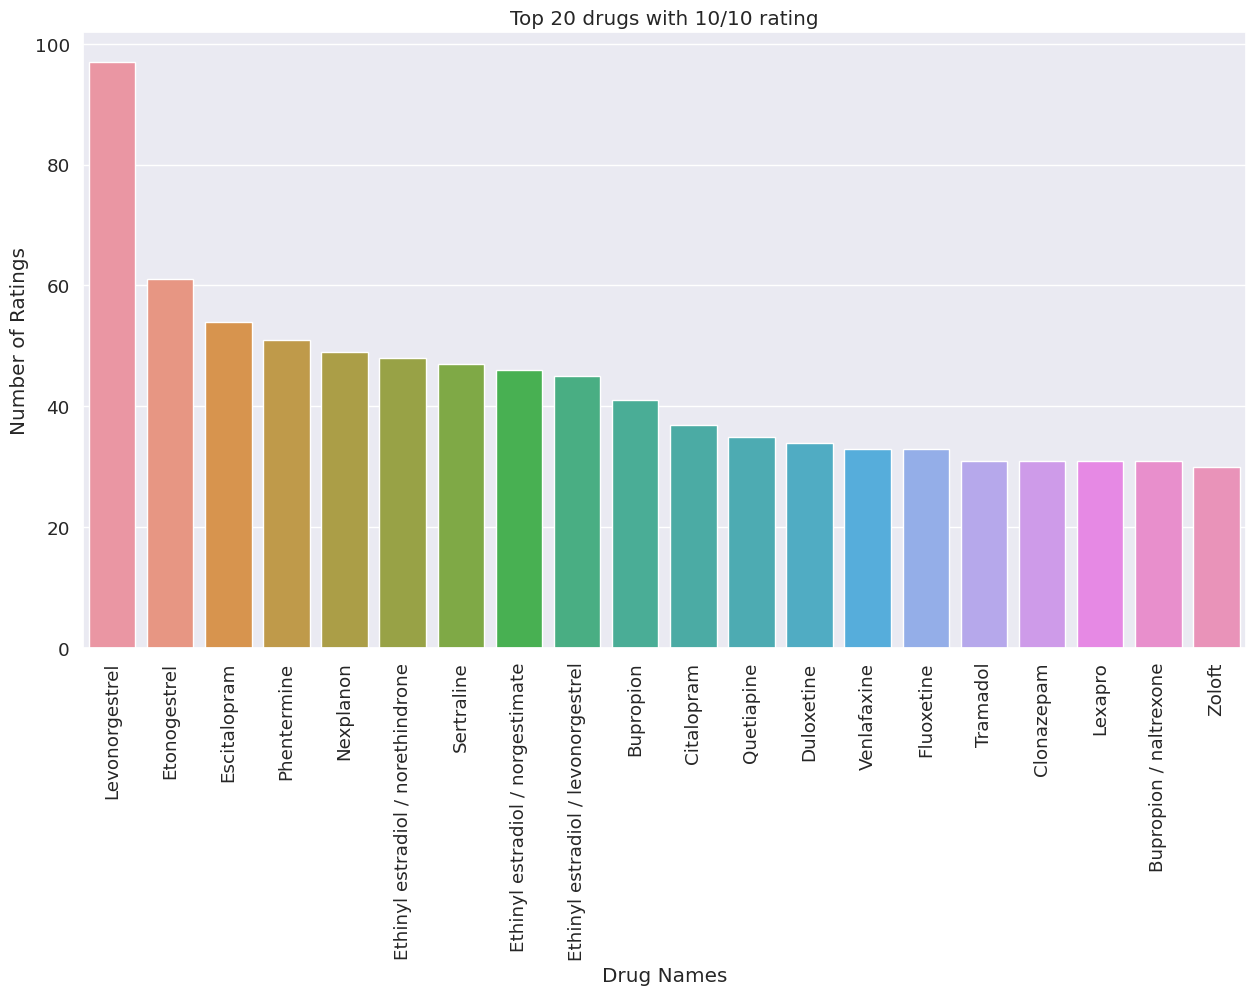

In [79]:
sns_rating = sns.barplot(x = DRUGNAME[0:20], y = DRUG_RATING[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

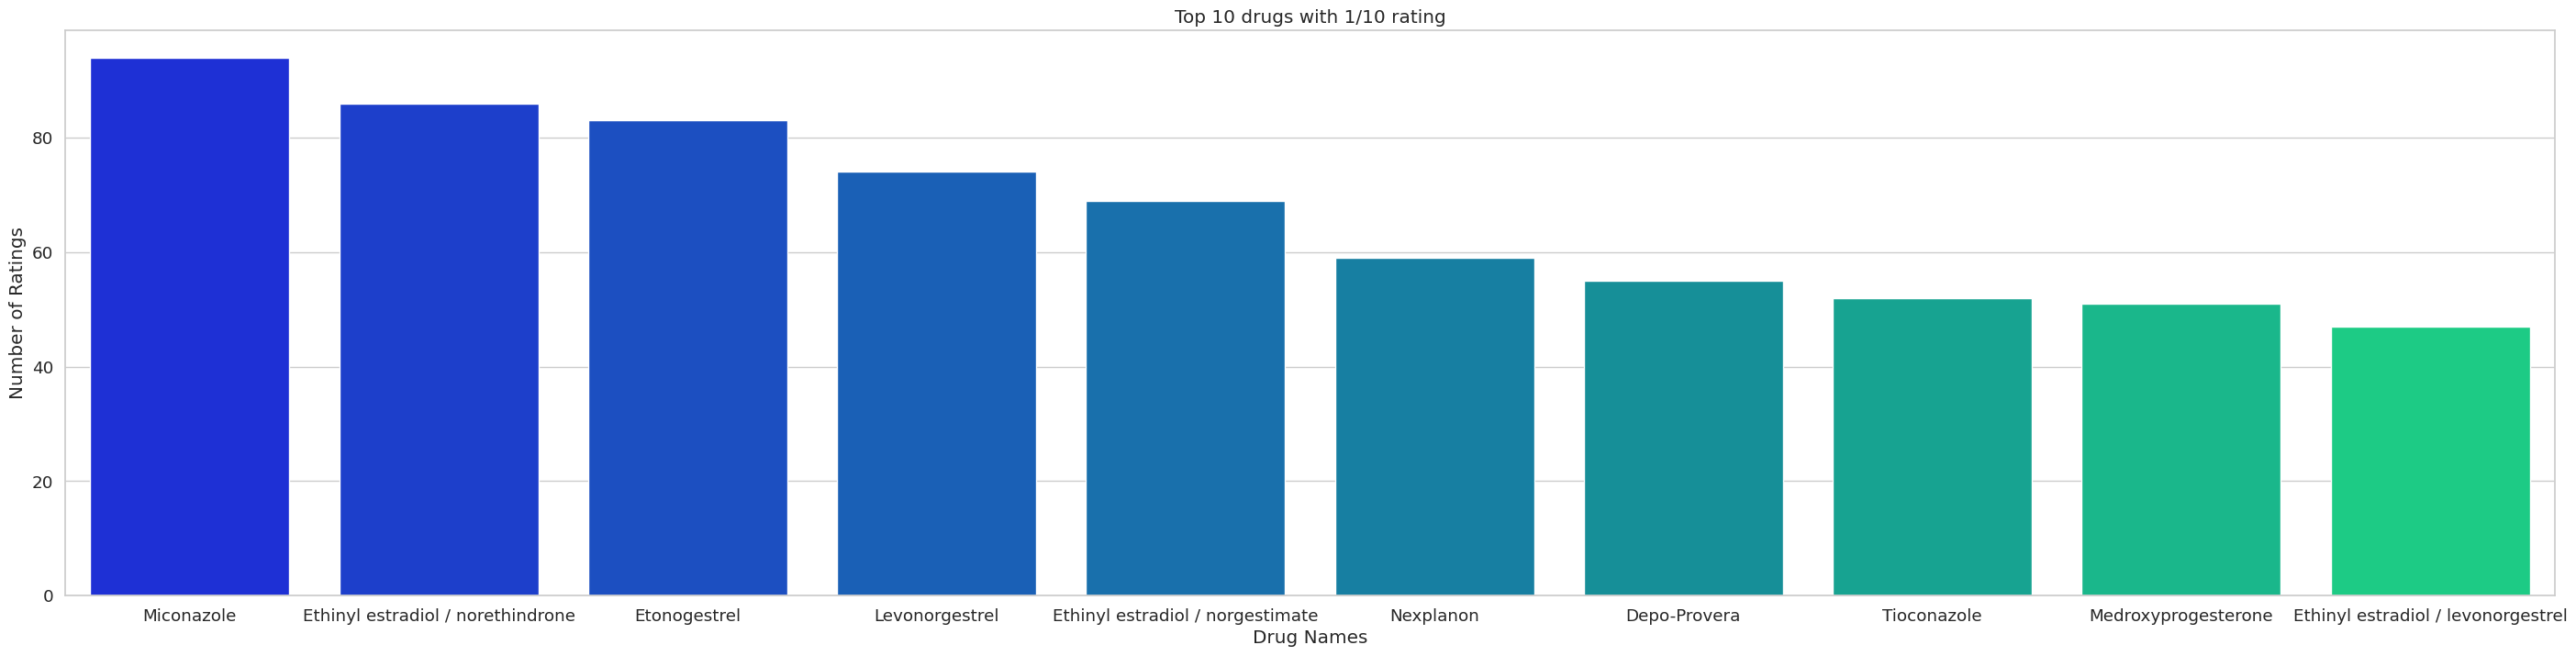

In [80]:
sns.set(font_scale = 1.2, style = 'whitegrid')
plt.rcParams['figure.figsize'] = [35, 8]

RATING = dict(df.loc[df.RATING == '1', "DRUGNAME"].value_counts())
DRUGNAME = list(RATING.keys())
DRUG_RATING = list(RATING.values())

sns_RATING = sns.barplot(x = DRUGNAME[0:10], y = DRUG_RATING[0:10], palette = 'winter')

sns_RATING.set_title('Top 10 drugs with 1/10 rating')
sns_RATING.set_ylabel("Number of Ratings")
sns_RATING.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

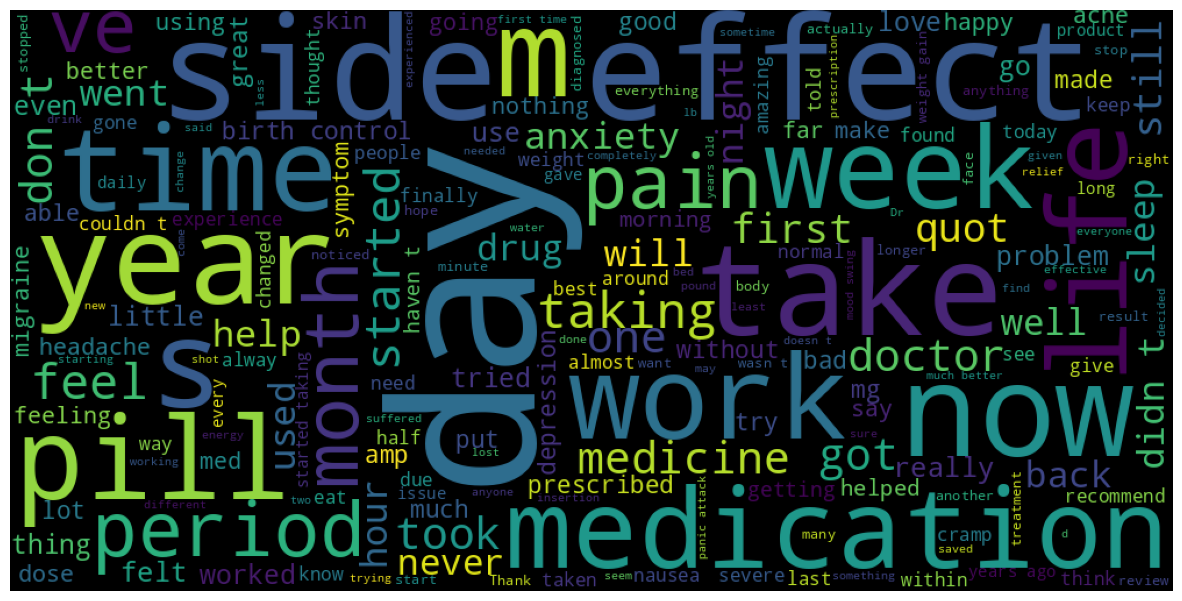

In [81]:
#!pip install wordcloud
from wordcloud import WordCloud# Word cloud of the reviews with rating equal to 10
df_rate_ten = df.loc[df.RATING == '10', 'REVIEW']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

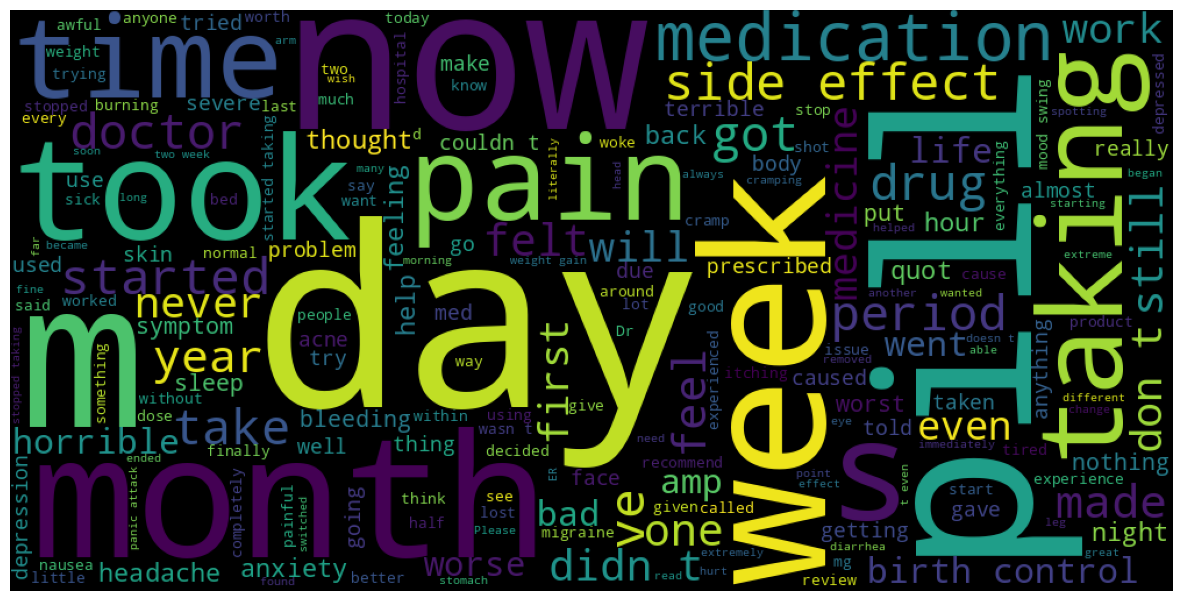

In [82]:
from wordcloud import WordCloud# Word cloud of the reviews with rating equal to 1
df_rate_ten = df.loc[df.RATING == '1', 'REVIEW']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

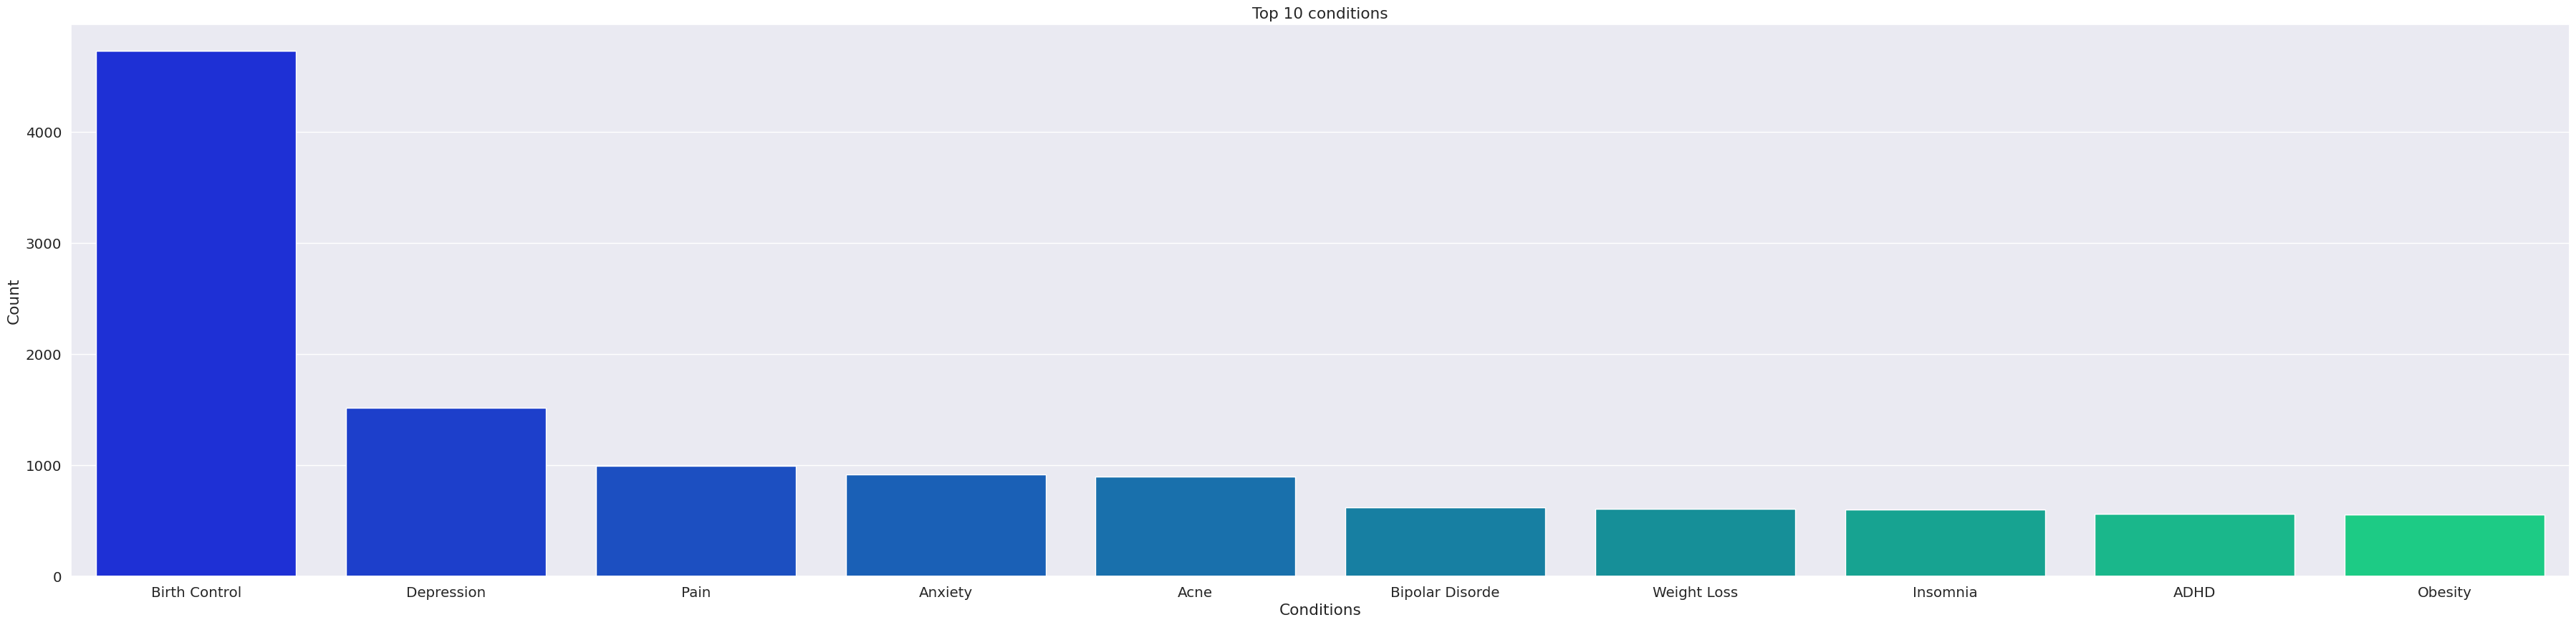

In [83]:
# This barplot show the top 10 conditions the people are suffering.
cond = dict(df['CONDITION'].value_counts())
top_CONDITION = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [45, 10]

sns_ = sns.barplot(x = top_CONDITION, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");

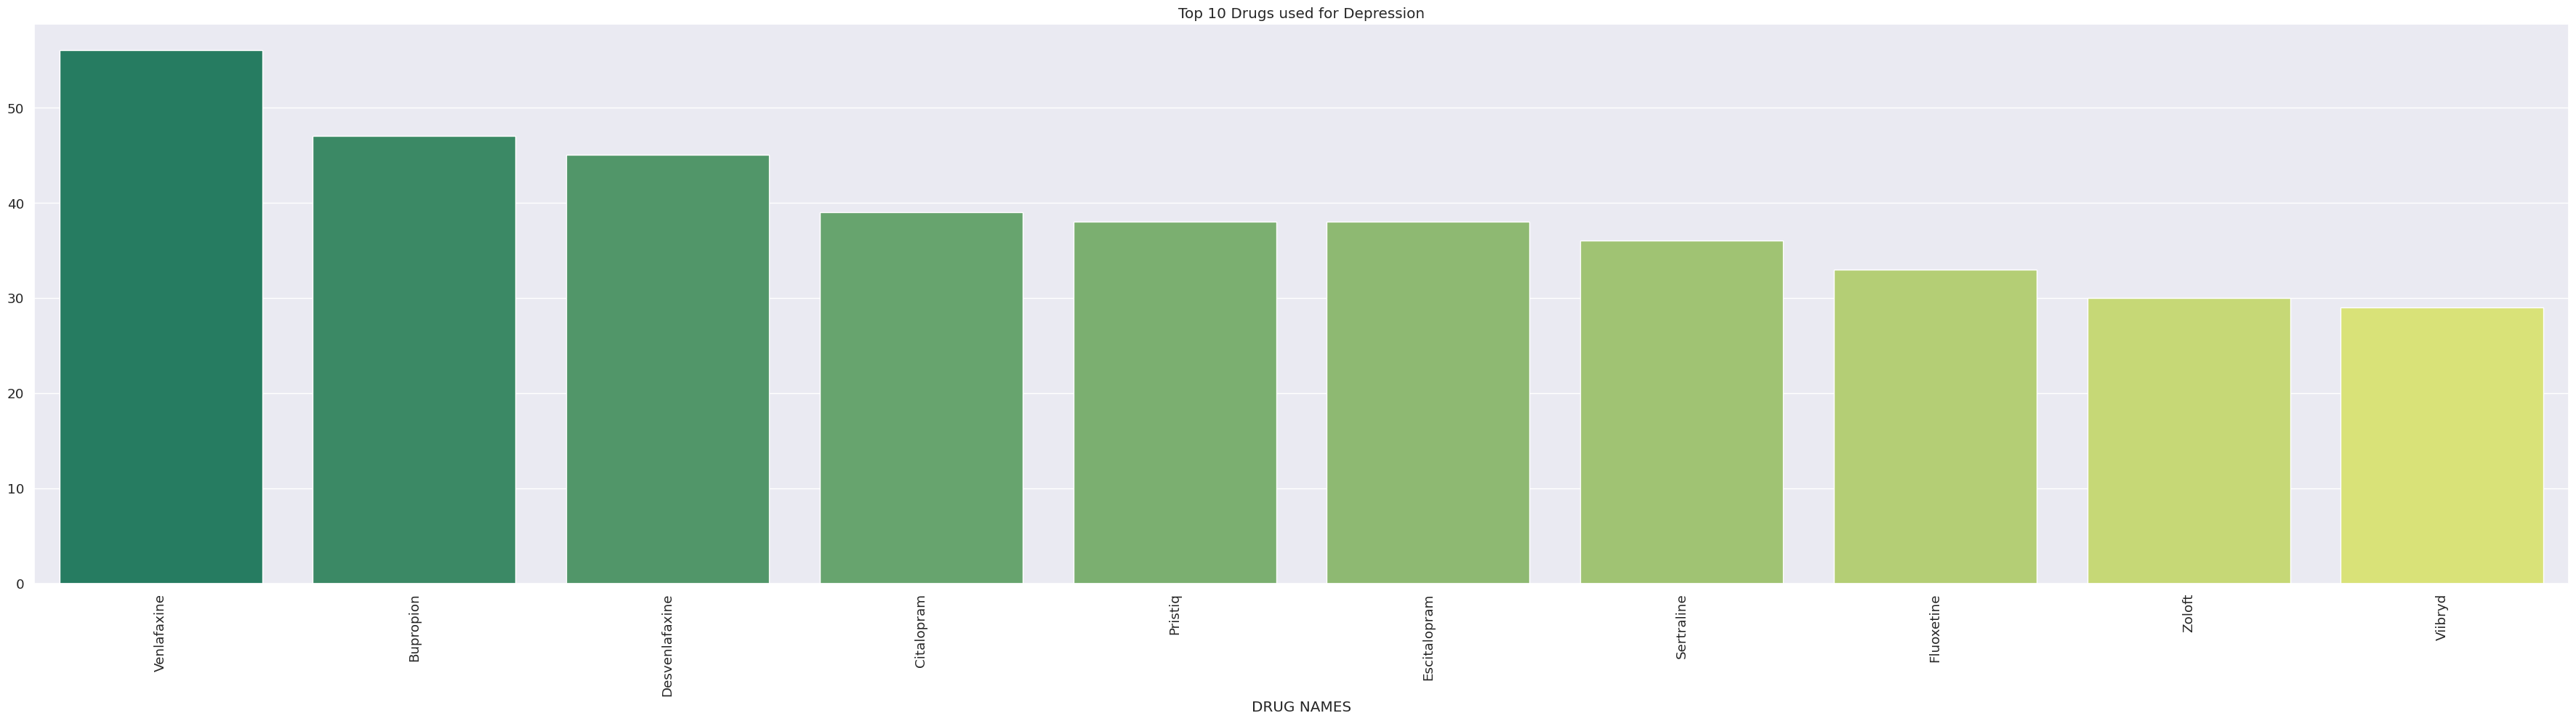

In [121]:
# Top 10 drugs which are used for the top condition, Depression
df = df[df['CONDITION'] == 'Depression']['DRUGNAME'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df.index, y = df.values, palette = 'summer')
sns_.set_xlabel('DRUG NAMES')
sns_.set_title("Top 10 Drugs used for Depression")
plt.setp(sns_.get_xticklabels(), rotation = 90);

In [87]:
df1

,ID,DRUG NAME,CONDITION,REVIEW,RATING,DATE,USEFUL COUNT,Unnamed: 7,Unnamed: 8
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,May-20,27,NaN,NaN
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,Apr-27,192,NaN,NaN
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,Dec-14,17,NaN,NaN
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,Nov-03,10,NaN,NaN
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,Nov-27,37,NaN,NaN
...,...,...,...,...,...,...,...,...,...
12094,198223,Ranolazine,Angina,"""I had angina due to blocked artery, started o...",6,Apr-30,2,NaN,NaN
12095,226971,Etonogestrel,Birth Control,"""I&#039;ve had Nexplanon for over a year now a...",10,Sep-29,56,NaN,NaN
12096,172093,Amitiza,Constipation,Chronic,"""I am a 25 year old female. I have been consti...",10,2013,96.0,NaN
12097,185585,Saxenda,Obesity,"""I have had a 30lb weight gain since May of la...",10,Mar-04,29,NaN,NaN


In [88]:
df2

,ID,DRUG NAME,CONDITION,REVIEW,RATING,DATE,USEFUL COUNT,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,Feb-28,22,NaN,NaN,NaN
1,206473,Mesalamine,Crohn's Disease,"""My son has Crohn&#039;s disease and has done ...",8,May-17,17,NaN,NaN,NaN
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,Sep-29,3,NaN,NaN,NaN
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,Mar-05,35,NaN,NaN,NaN
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,Oct-22,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
14004,96754,Crisaborole,Atopic Dermatitis,"""This is the greatest solution to a problem th...",10,Sep-20,7,NaN,NaN,NaN
14005,194059,Stribild,HIV Infection,"""I was newly diagnosed December 2014. My CD4 c...",10,Mar-18,20,NaN,NaN,NaN
14006,51718,Aczone,Acne,"""After my teen years I thought I had finally g...",10,Jan-23,42,NaN,NaN,NaN
14007,155666,Metronidazole,Bacterial Vaginitis,"""Well, I&#039;ve been taking it for a few days...",6,Jun-11,14,NaN,NaN,NaN


In [90]:
df = pd.concat([df1, df2])
df

,ID,DRUG NAME,CONDITION,REVIEW,RATING,DATE,USEFUL COUNT,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,May-20,27,NaN,NaN,NaN
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,Apr-27,192,NaN,NaN,NaN
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,Dec-14,17,NaN,NaN,NaN
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,Nov-03,10,NaN,NaN,NaN
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,Nov-27,37,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
14004,96754,Crisaborole,Atopic Dermatitis,"""This is the greatest solution to a problem th...",10,Sep-20,7,NaN,NaN,NaN
14005,194059,Stribild,HIV Infection,"""I was newly diagnosed December 2014. My CD4 c...",10,Mar-18,20,NaN,NaN,NaN
14006,51718,Aczone,Acne,"""After my teen years I thought I had finally g...",10,Jan-23,42,NaN,NaN,NaN
14007,155666,Metronidazole,Bacterial Vaginitis,"""Well, I&#039;ve been taking it for a few days...",6,Jun-11,14,NaN,NaN,NaN


In [91]:
df2 = df[df['USEFUL COUNT'] > '10']
df2

,ID,DRUG NAME,CONDITION,REVIEW,RATING,DATE,USEFUL COUNT,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,May-20,27,NaN,NaN,NaN
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,Apr-27,192,NaN,NaN,NaN
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,Dec-14,17,NaN,NaN,NaN
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,Nov-27,37,NaN,NaN,NaN
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,Nov-28,43,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
14003,110222,Nexplanon,Birth Control,"""I wanted to share my positive experience. I f...",10,Mar-15,19,NaN,NaN,NaN
14004,96754,Crisaborole,Atopic Dermatitis,"""This is the greatest solution to a problem th...",10,Sep-20,7,NaN,NaN,NaN
14005,194059,Stribild,HIV Infection,"""I was newly diagnosed December 2014. My CD4 c...",10,Mar-18,20,NaN,NaN,NaN
14006,51718,Aczone,Acne,"""After my teen years I thought I had finally g...",10,Jan-23,42,NaN,NaN,NaN


In [95]:
df = df[['ID', 'DRUGNAME', 'CONDITION', 'REVIEW', 'RATING', 'DATE',
       'USEFUL COUNT']]
df

,ID,DRUGNAME,CONDITION,REVIEW,RATING,DATE,USEFUL COUNT
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,May-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,Apr-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,Dec-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,Nov-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,Nov-27,37
...,...,...,...,...,...,...,...
14004,96754,Crisaborole,Atopic Dermatitis,"""This is the greatest solution to a problem th...",10,Sep-20,7
14005,194059,Stribild,HIV Infection,"""I was newly diagnosed December 2014. My CD4 c...",10,Mar-18,20
14006,51718,Aczone,Acne,"""After my teen years I thought I had finally g...",10,Jan-23,42
14007,155666,Metronidazole,Bacterial Vaginitis,"""Well, I&#039;ve been taking it for a few days...",6,Jun-11,14


In [97]:
df_CONDITION = df2.groupby(['CONDITION'])['DRUG NAME'].nunique().sort_values(ascending=False)
df_CONDITION = pd.DataFrame(df_CONDITION).reset_index()
df_CONDITION

,CONDITION,DRUG NAME
0,Pain,124
1,Birth Control,120
2,Depression,87
3,High Blood Pressure,74
4,Acne,69
...,...,...
527,Lichen Planus,1
528,Lymphocytic Colitis,1
529,Macular Edema,1
530,Meniere's Disease,1


In [98]:
df_CONDITION_1 = df_CONDITION[df_CONDITION['DRUG NAME'] == 1].reset_index()

all_list = set(df.index)

# deleting them
CONDITION_list = []
for i,j in enumerate(df['CONDITION']):
    for c in list(df_CONDITION_1['CONDITION']):
        if j == c:
            CONDITION_list.append(i)
            
new_idx = all_list.difference(set(CONDITION_list))
df = df.iloc[list(new_idx)].reset_index()
del df['index']

In [99]:
df.shape

(13843, 7)

In [11]:
# removing the conditions with <span> in it.

all_list = set(df.index)
span_list = []
for i,j in enumerate(df['CONDITION']):
    if "</span>" in str(j):
        span_list.append(i)
new_idx = all_list.difference(set(span_list))
df = df.iloc[list(new_idx)].reset_index()
del df['index']

In [100]:
import re
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [101]:
# removing some stopwords from the list of stopwords as they are important for drug recommendation

stops = set(stopwords.words('english'))

not_stop = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't",
            "mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in not_stop:
    stops.remove(i)

In [102]:
stemmer = SnowballStemmer('english')

def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))

# create a list of stopwords
nlp = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS
parser = English()
punctuations = string.punctuation
# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens


In [103]:
%time df['REVIEW_clean'] = df['REVIEW'].apply(review_to_words)
df.head()

<ipython-input-102-1b5de41d8491>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


CPU times: user 10.3 s, sys: 27.5 ms, total: 10.4 s
Wall time: 10.5 s


,ID,DRUGNAME,CONDITION,REVIEW,RATING,DATE,USEFUL COUNT,REVIEW_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,May-20,27,no side effect take combin bystol mg fish oil
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,Apr-27,192,son halfway fourth week intuniv becam concern ...
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,Dec-14,17,use take anoth oral contracept pill cycl happi...
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,Nov-03,10,first time use form birth control glad went pa...
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,Nov-27,37,suboxon complet turn life around feel healthie...


In [104]:
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,2))
#  tf-idf vector
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [105]:
# part 1---vader sentiment analyzer for c_review
analyzer = SentimentIntensityAnalyzer()
# create new col vaderReviewScore based on C-review
df['vaderReviewScore'] = df['REVIEW_clean'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# define the positive, neutral and negative
positive_num = len(df[df['vaderReviewScore'] >=0.05])
neutral_num = len(df[(df['vaderReviewScore'] >-0.05) & (df['vaderReviewScore']<0.05)])
negative_num = len(df[df['vaderReviewScore']<=-0.05])

# create new col vaderSentiment based on vaderReviewScore
df['vaderSentiment'] = df['vaderReviewScore'].map(lambda x:int(2) if x>=0.05 else int(1) if x<=-0.05 else int(0) )
df['vaderSentiment'].value_counts() # 2-pos: 99519; 1-neg: 104434; 0-neu: 11110

# label pos/neg/neu based on vaderSentiment result
df.loc[df['vaderReviewScore'] >=0.05,"vaderSentimentLabel"] ="positive"
df.loc[(df['vaderReviewScore'] >-0.05) & (df['vaderReviewScore']<0.05),"vaderSentimentLabel"]= "neutral"
df.loc[df['vaderReviewScore']<=-0.05,"vaderSentimentLabel"] = "negative"

In [107]:
df['vaderReviewScore'].max()

0.9935

In [106]:
df['vaderReviewScore'].min()

-0.9905

In [108]:
criteria = [df['vaderReviewScore'].between(-0.997, -0.799), df['vaderReviewScore'].between(-0.798, -0.601), df['vaderReviewScore'].between(-0.600, 0.403), df['vaderReviewScore'].between(-0.402, -0.205), df['vaderReviewScore'].between(-0.204, -0.007), df['vaderReviewScore'].between(-0.006,0.191), df['vaderReviewScore'].between(0.192, 0.389), df['vaderReviewScore'].between(0.390, 0.587), df['vaderReviewScore'].between(0.588, 0.785), df['vaderReviewScore'].between(0.786, 1)]
values = [1, 2, 3,4,5,6,7,8,9,10]

df['normalVaderScore'] = np.select(criteria, values, 0)

In [109]:
df

,ID,DRUGNAME,CONDITION,REVIEW,RATING,DATE,USEFUL COUNT,REVIEW_clean,vaderReviewScore,vaderSentiment,vaderSentimentLabel,normalVaderScore
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,May-20,27,no side effect take combin bystol mg fish oil,-0.2960,1,negative,3
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,Apr-27,192,son halfway fourth week intuniv becam concern ...,0.6929,2,positive,9
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,Dec-14,17,use take anoth oral contracept pill cycl happi...,0.2732,2,positive,3
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,Nov-03,10,first time use form birth control glad went pa...,0.4199,2,positive,8
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,Nov-27,37,suboxon complet turn life around feel healthie...,0.8934,2,positive,10
...,...,...,...,...,...,...,...,...,...,...,...,...
13838,213386,Nuvigil,Chronic Fatigue Syndrome,"""Got a trial prescription for Nuvigil 150mg ta...",9,Jul-06,113,got trial prescript nuvigil mg tablet first da...,0.8361,2,positive,10
13839,42588,Concerta,ADHD,"""I am 18 and I&#039;ve been on Concerta for ju...",5,Jan-09,27,concerta year took extra year high school catc...,0.3182,2,positive,3
13840,970,Pentosan polysulfate sodium,Interstitial Cystitis,"""I have been taking Elmiron for about 7 years ...",8,Mar-07,26,take elmiron year interstiti cystiti no effect...,-0.2644,1,negative,3
13841,128914,Phentermine,Weight Loss,"""I took my first dose on May 10th, I dropped 9...",9,May-14,34,took first dose may th drop lbs immedi within ...,0.5401,2,positive,8


In [110]:
# type(df['normalVaderScore'][0])
# df['RATING'].astype(int)
df['RATING'] = pd.to_numeric(df['RATING'],errors = 'coerce')
df['RATING'] = df['RATING'].fillna(0)

In [111]:
#Final Normalized Score combining Rating and normalVaderScore
df['meanNormalizedScore'] = (df['RATING'] + df['normalVaderScore'])/2
df.head()

,ID,DRUGNAME,CONDITION,REVIEW,RATING,DATE,USEFUL COUNT,REVIEW_clean,vaderReviewScore,vaderSentiment,vaderSentimentLabel,normalVaderScore,meanNormalizedScore
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,May-20,27,no side effect take combin bystol mg fish oil,-0.2960,1,negative,3,6.0
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,Apr-27,192,son halfway fourth week intuniv becam concern ...,0.6929,2,positive,9,8.5
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,Dec-14,17,use take anoth oral contracept pill cycl happi...,0.2732,2,positive,3,4.0
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,Nov-03,10,first time use form birth control glad went pa...,0.4199,2,positive,8,8.0
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,Nov-27,37,suboxon complet turn life around feel healthie...,0.8934,2,positive,10,9.5


In [113]:
grouped = df.groupby(['CONDITION','DRUGNAME', 'ID']).agg({'meanNormalizedScore' : ['mean']})
grouped.to_csv('Medicare_Normalized_results')
grouped1 = grouped.reset_index()
grouped1.head(100)

,CONDITION,DRUGNAME,ID,meanNormalizedScore
,,,,mean
0,0</span> users found this comment helpful.,Depo-Provera,230608,7.0
1,0</span> users found this comment helpful.,Drysol,221271,6.0
2,0</span> users found this comment helpful.,GoLYTELY,3884,8.0
3,0</span> users found this comment helpful.,Implanon,107300,6.5
4,0</span> users found this comment helpful.,Implanon,107524,9.0
...,...,...,...,...
95,ADHD,Adderall,88430,2.5
96,ADHD,Adderall,88437,4.5
97,ADHD,Adderall,88462,4.0


In [115]:
#Sorting Data based on Condition and then by drug
grouped = df.groupby(['CONDITION','DRUGNAME']).agg({'meanNormalizedScore' : ['mean']})
grouped.to_csv('Grouped_Drug_Recommendation_Normalized')
grouped

meanNormalizedScore
                                                                                    mean
CONDITION                                  DRUGNAME                                     
0</span> users found this comment helpful. Depo-Provera                         7.000000
                                           Drysol                               6.000000
                                           GoLYTELY                             8.000000
                                           Implanon                             7.750000
                                           Loestrin 24 Fe                       6.500000
...                                                                                  ...
min)                                       Empagliflozin / metformin            6.500000
                                           Metformin                            8.500000
moterol)                                   Budesonide / formoterol              6.714286
                                           Formoterol                           6.000000
mulation) (phenylephrine)                  Phenylephrine                        9.500000

[2855 rows x 1 columns]

In [116]:
grouped1.set_index('ID')

,CONDITION,DRUGNAME,meanNormalizedScore
,,,mean
ID,,,
230608,0</span> users found this comment helpful.,Depo-Provera,7.0
221271,0</span> users found this comment helpful.,Drysol,6.0
3884,0</span> users found this comment helpful.,GoLYTELY,8.0
107300,0</span> users found this comment helpful.,Implanon,6.5
107524,0</span> users found this comment helpful.,Implanon,9.0
...,...,...,...
32765,moterol),Budesonide / formoterol,6.0
32767,moterol),Budesonide / formoterol,5.0


In [117]:
user_ratings = grouped1.pivot_table(index = ['CONDITION'], columns = ['ID'], values = 'meanNormalizedScore')
user_ratings1 = grouped1.pivot_table(index = ['CONDITION'], columns = ['ID'], values = 'meanNormalizedScore')
user_ratings.head(20)
user_ratings.to_csv('Itemtoitem_recom.csv')

<ipython-input-117-239bed20bedf>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  user_ratings = grouped1.pivot_table(index = ['CONDITION'], columns = ['ID'], values = 'meanNormalizedScore')
<ipython-input-117-239bed20bedf>:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  user_ratings1 = grouped1.pivot_table(index = ['CONDITION'], columns = ['ID'], values = 'meanNormalizedScore')


In [118]:
user_ratings.iloc[0,:].sum(axis=0)

93.5

In [119]:

#Let's consider the top 50 similar rated drugs and predict the output.

predict_drug = int(input ("Enter a drug ID within range  0 to 1000000 : "))
count = 0
num1 = 0
den1 = 0
for i in cosine_vector:
    if user_ratings1.iloc[i[0],predict_drug] > 0:
            count = count + 1
            num1 = num1 + i[1] * user_ratings1.iloc[i[0],predict_drug]
            #print(num1)
            den1 = den1 + i[1]
            #print(den1)
            #print("{}..{}".format(i[0],i[1]))
        
    if count == 50:
        print ("Reached 50 :)")
        break

print("Expected Rating for 1st Drug for condition: {} is :{}".format(predict_drug,num1/den1))

Enter a drug ID within range  0 to 1000000 : 657
Expected Rating for 1st Drug for condition: 657 is :nan


<ipython-input-119-85c7f423f1b3>:20: RuntimeWarning: invalid value encountered in double_scalars
  print("Expected Rating for 1st Drug for condition: {} is :{}".format(predict_drug,num1/den1))


In [124]:
for i in range(user_ratings1.shape[1]):
    if user_ratings1.iloc[0,i] > 0:
        print("Id = {} , Rating = {}".format(i,user_ratings1.iloc[0,i]))

Id = 218 , Rating = 8.0
Id = 6231 , Rating = 6.5
Id = 6246 , Rating = 9.0
Id = 7785 , Rating = 3.0
Id = 8730 , Rating = 3.0
Id = 8734 , Rating = 9.0
Id = 9359 , Rating = 2.0
Id = 11204 , Rating = 1.5
Id = 11248 , Rating = 9.0
Id = 12789 , Rating = 6.5
Id = 13038 , Rating = 8.5
Id = 13048 , Rating = 2.5
Id = 13053 , Rating = 8.5
Id = 13088 , Rating = 6.0
Id = 13532 , Rating = 3.5
Id = 13656 , Rating = 7.0
